In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv("Iris.csv")

In [3]:
df.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [4]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
# Separate input and output data

In [6]:
inP = df.iloc[:,:-1]
outP = df["Species"]

In [7]:
inP.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [8]:
outP.head(3)

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
Name: Species, dtype: object

In [9]:
# Visualize the dataset

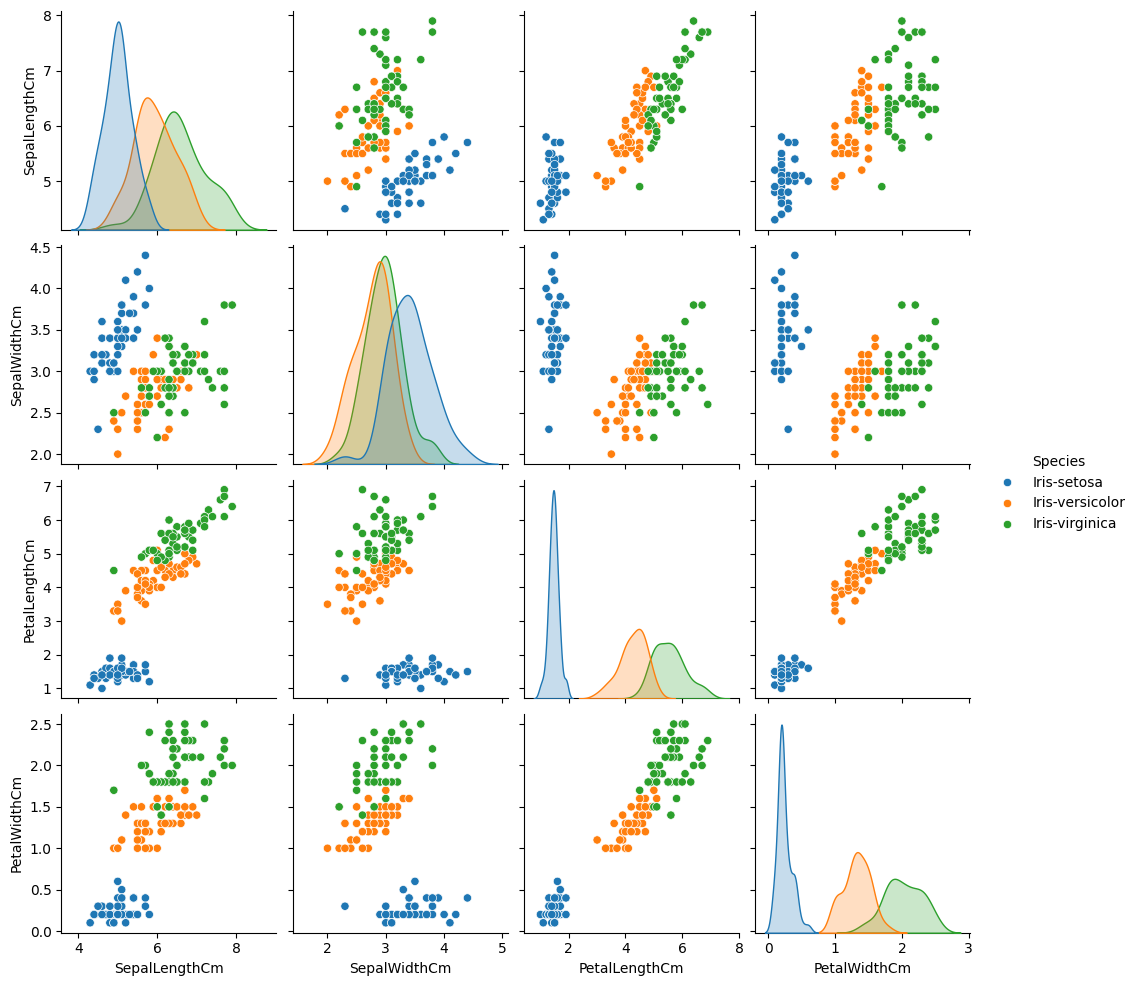

In [10]:
sns.pairplot(df, hue="Species")

plt.show()

In [11]:
# Selecting the first 100 rows from column index 4 (target variable)
y = df.iloc[0:100, 4].values  

# Converting target variable values: If 'Iris-setosa', assign -1; otherwise, assign 1
y = np.where(y == 'Iris-setosa', -1, 1)  

# Selecting the first 100 rows and columns with index 0 and 2 (features)
X = df.iloc[0:100, [0, 2]].values

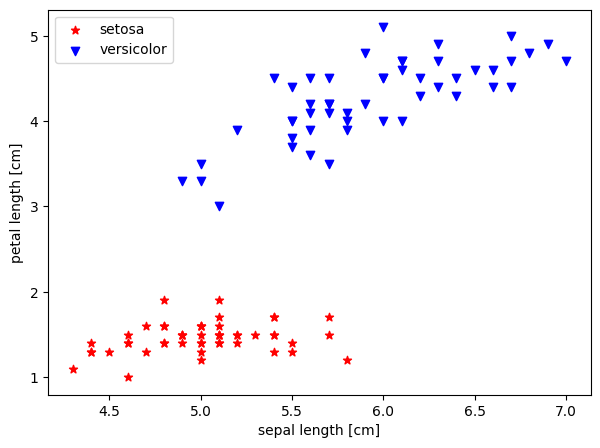

In [12]:
# Plotting the data
plt.figure(figsize=(7,5))  # Set figure size
plt.scatter(X[:50, 0], X[:50, 1], color='r', marker='*', label='setosa')  # Plot setosa
plt.scatter(X[50:100, 0], X[50:100, 1], color='b', marker='v', label='versicolor')  # Plot versicolor
plt.xlabel('sepal length [cm]')  # X-axis label
plt.ylabel('petal length [cm]')  # Y-axis label
plt.legend(loc='upper left')  # Display legend in upper left corner
plt.show()  # Show the plot


In [13]:
class CustomNeuron:
    """
    A simple neural unit implementing a perceptron algorithm.
    """
    
    def __init__(self, rate=0.01, cycles=50, seed=42):
        """
        Initializes the perceptron with a learning rate, number of iterations, and random seed.
        """
        self.rate = rate
        self.cycles = cycles
        self.seed = seed
        self.weights = None
        self.misclassifications = []
    
    def initialize_weights(self, input_dim):
        """Initializes weights randomly based on the input dimension."""
        rng = np.random.default_rng(self.seed)
        self.weights = rng.normal(0, 0.01, size=input_dim + 1)
    
    def train(self, data, labels):
        """
        Trains the perceptron model on the provided dataset.
        """
        self.initialize_weights(data.shape[1])
        
        for _ in range(self.cycles):
            error_count = 0
            for features, target in zip(data, labels):
                adjustment = self.rate * (target - self.classify(features))
                self.weights[1:] += adjustment * features
                self.weights[0] += adjustment  # Adjust bias term
                error_count += int(adjustment != 0.0)
            self.misclassifications.append(error_count)
        
        return self
    
    def compute_signal(self, data):
        """Computes the weighted sum (net input) for the given data."""
        return np.dot(data, self.weights[1:]) + self.weights[0]
    
    def classify(self, data):
        """Determines the class label based on the net input."""
        return np.where(self.compute_signal(data) >= 0.0, 1, -1)

In [14]:
ppn = CustomNeuron(rate=0.1, cycles=10)


In [15]:
ppn.train(X, y)


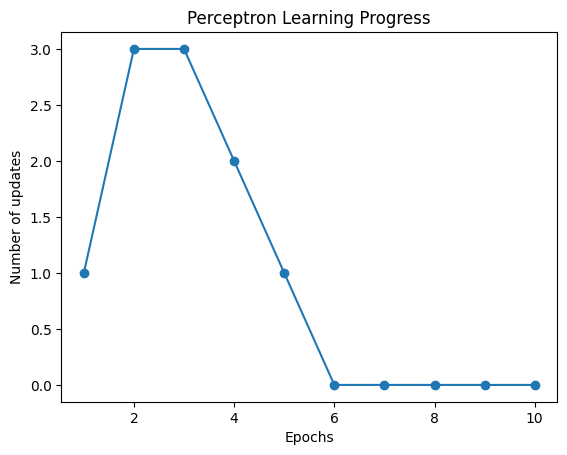

In [16]:
plt.plot(range(1, len(ppn.misclassifications) + 1), ppn.misclassifications, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.title('Perceptron Learning Progress')
plt.show()


In [17]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    """
    Plots decision boundaries for a classifier.

    Parameters:
    -----------
    X : ndarray
        Feature set with shape (n_samples, n_features).
    y : ndarray
        Target labels.
    classifier : object
        A trained classifier with a `classify` method.
    resolution : float, optional
        Grid resolution for contour plot (default is 0.02).
    """

    # Define markers and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Determine min and max values for the grid
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Create a mesh grid
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))

    # Predict class labels for each grid point
    Z = classifier.classify(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    # Plot decision boundary
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Scatter plot of class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx], marker=markers[idx],
                    label=cl, edgecolor='black')



In [18]:
data=df.drop_duplicates(subset="Species",)

In [19]:
df.value_counts("Species")



Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

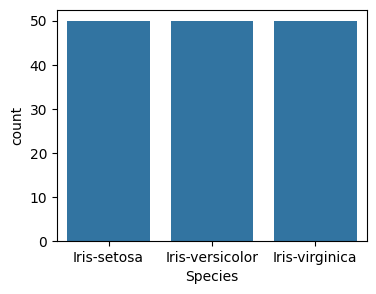

In [20]:
plt.figure(figsize=(4,3))

sns.countplot(x='Species', data=df)

plt.show()

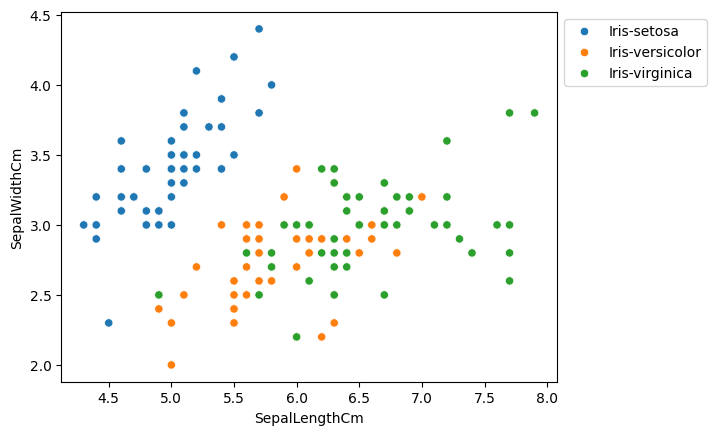

In [21]:
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', data=df,hue='Species' )

plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()


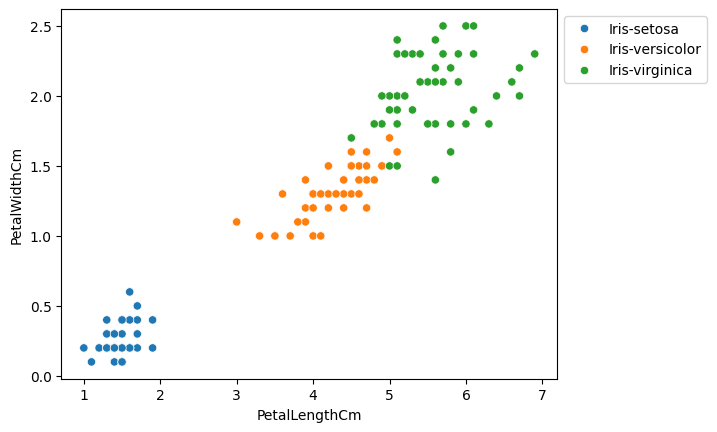

In [22]:
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm',
hue='Species', data=df, )
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()


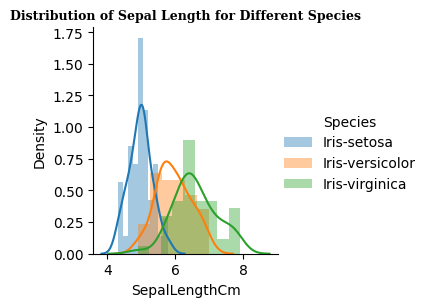

In [101]:
plot = sns.FacetGrid(df, hue="Species")
plot.map(sns.distplot, "SepalLengthCm").add_legend()
plt.title("Distribution of Sepal Length for Different Species",fontsize=9, fontweight='bold', fontfamily='serif')

plt.savefig("SepalLengthCm.png", dpi=1500,bbox_inches='tight')

plt.show()

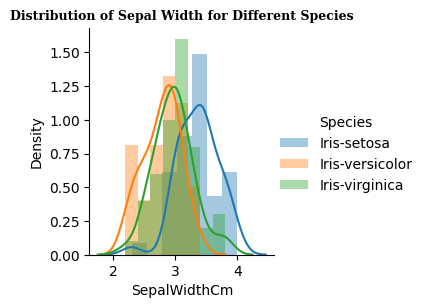

In [105]:
plot = sns.FacetGrid(df, hue="Species")
plot.map(sns.distplot, "SepalWidthCm").add_legend()
plt.title("Distribution of Sepal Width for Different Species",fontsize=9, fontweight='bold', fontfamily='serif')

plt.savefig("SepalWidthCm.png", dpi=1500,bbox_inches='tight')

plt.show()

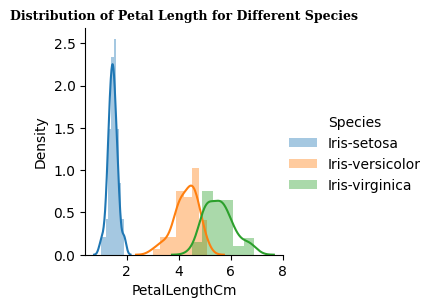

In [106]:
plot = sns.FacetGrid(df, hue="Species")
plot.map(sns.distplot, "PetalLengthCm").add_legend()
plt.title("Distribution of Petal Length for Different Species",fontsize=9, fontweight='bold', fontfamily='serif')

plt.savefig("PetalLengthCm.png",dpi=1500,bbox_inches='tight')

plt.show()

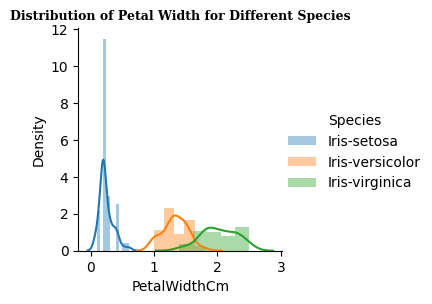

In [107]:
plot = sns.FacetGrid(df, hue="Species")
plot.map(sns.distplot, "PetalWidthCm").add_legend()
plt.title("Distribution of Petal Width for Different Species",fontsize=9, fontweight='bold', fontfamily='serif')

plt.savefig("PetalWidthCm.png", dpi=1500,bbox_inches='tight')

plt.show()

In [24]:
def graph(y):
 sns.boxplot(x="Species", y=y, data=df)
 plt.figure(figsize=(10,10))
 # Adding the subplot at the specified
 # grid position
 plt.subplot(221)
 graph('SepalLengthCm')
 plt.subplot(222)
 graph('SepalWidthCm')
 plt.subplot(223)
 graph('PetalLengthCm')
 plt.subplot(224)
 graph('PetalWidthCm')
 plt.show()

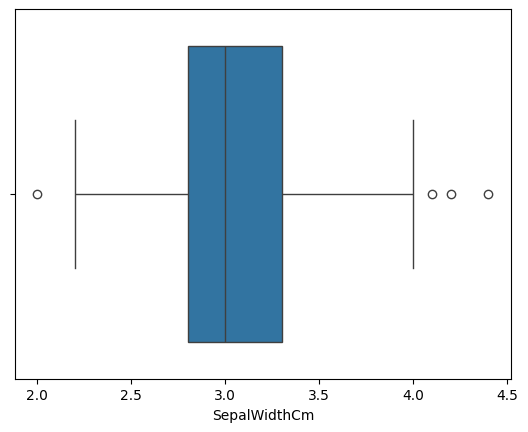

In [25]:
sns.boxplot(x='SepalWidthCm', data=df)


plt.show()

Old Shape:  (150, 5)
New Shape:  (146, 5)


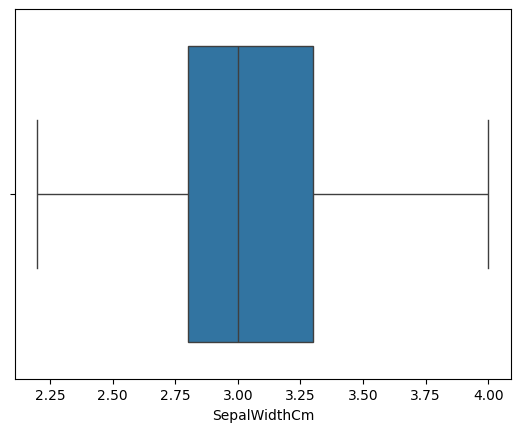

In [26]:
# IQR
q1 = np.percentile(df['SepalWidthCm'], 25,interpolation = 'midpoint')
q3 = np.percentile(df['SepalWidthCm'], 75,interpolation = 'midpoint')
IQR = q3- q1

print("Old Shape: ", df.shape)

# Upper bound
upper = np.where(df['SepalWidthCm'] >= (q3+1.5*IQR))

# Lower bound
lower = np.where(df['SepalWidthCm'] <= (q1-1.5*IQR))

# Removing the Outliers
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

print("New Shape: ", df.shape)

sns.boxplot(x='SepalWidthCm', data=df)

plt.show()


# LogisticRegression

In [27]:
# Train the model

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score,f1_score


In [29]:
x_train, x_test, y_train, y_test = train_test_split(inP,outP, test_size=0.2, random_state=43)

In [30]:
lr = LogisticRegression()
lr.fit(x_train,y_train)


LogisticRegression()

In [31]:
lr.score(x_test,y_test)*100

100.0

In [32]:
lr.predict([[7.2,3.2,6,1.8]])

array(['Iris-virginica'], dtype=object)

In [33]:
lr.predict([[5.9,3,5.1,1.8]])

array(['Iris-virginica'], dtype=object)

In [34]:
lr.predict([[5.5,2.6,4.4,1.2]])

array(['Iris-versicolor'], dtype=object)

# Model Performance & Evaluation

***Confusion Matrix***

In [35]:
y_pred = lr.predict(x_test)

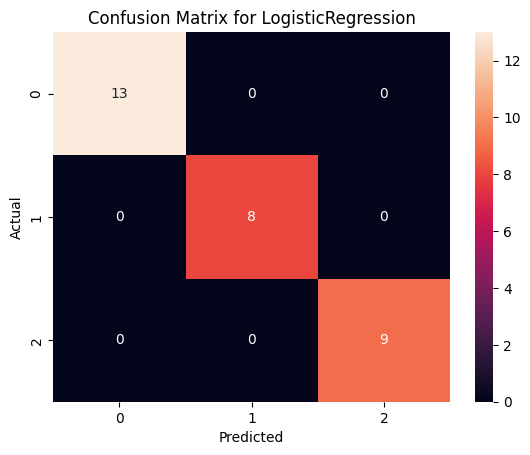

In [36]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for LogisticRegression")

plt.savefig("LogisticRegression.jpg", dpi=2000, bbox_inches="tight")

plt.show()

***Precision Score***

In [37]:
precision_score(y_test,y_pred, average = 'weighted')*100

100.0

***Recall Score***

In [38]:
recall_score(y_test,y_pred, average = 'macro')*100

100.0

***F1 Score***

In [39]:
f1_score(y_test,y_pred, average = 'micro')*100

100.0

# DecisionTreeClassifier


In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
from sklearn.datasets import load_iris

In [41]:
# Initialize Decision Tree Model
# dtc = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=3, random_state=48)

# Train the model
dtc.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=3,
                       random_state=48)

In [42]:
# Predict on test data
y_pred = dtc.predict(x_test)


In [43]:
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)


Accuracy: 90.0


In [44]:
# Classification Report
print("Classification Report:\n", (classification_report(y_test, y_pred)))


Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.78      0.88      0.82         8
 Iris-virginica       0.88      0.78      0.82         9

       accuracy                           0.90        30
      macro avg       0.88      0.88      0.88        30
   weighted avg       0.90      0.90      0.90        30



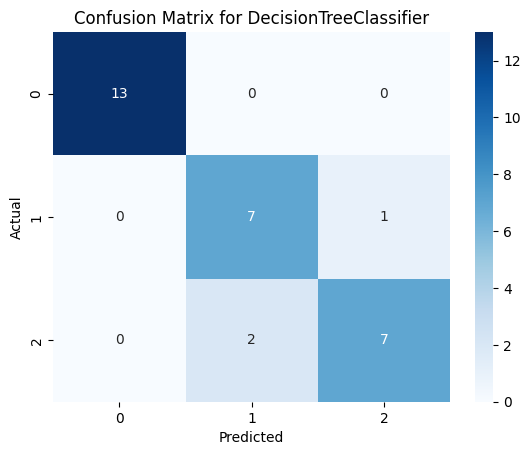

In [45]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for DecisionTreeClassifier")

plt.savefig("DecisionTreeClassifier.jpg", dpi=2000, bbox_inches="tight")


plt.show()

In [46]:
precision_score(y_test,y_pred, average = 'weighted')*100

90.32407407407406

In [47]:
recall_score(y_test,y_pred, average = 'macro')*100

88.42592592592592

In [48]:
f1_score(y_test,y_pred, average = 'micro')*100

90.0

In [49]:
iris = load_iris()

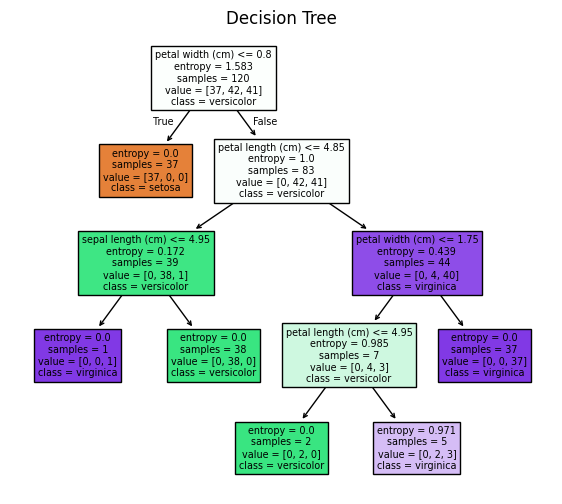

In [50]:
# Plot the Decision Tree
plt.figure(figsize=(7, 6))
tree.plot_tree(dtc, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Decision Tree")

plt.savefig("DecisionTree.jpg", dpi=2000, bbox_inches="tight")

plt.show()


# SVM(Support Vector Machine) Classifier

In [51]:
from sklearn.svm import SVC

In [52]:
# Initialize SVM model with Radial Basis Function (RBF) kernel
svm_model = SVC(kernel='linear', C=1.0, gamma='scale')


In [53]:
# Train the model
svm_model.fit(x_train, y_train)

SVC(kernel='linear')

In [54]:
# Predict on test data
y_pred = svm_model.predict(x_test)


In [70]:
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100,"%")

Accuracy: 93.33333333333333 %


In [71]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.80      1.00      0.89         8
 Iris-virginica       1.00      0.78      0.88         9

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.92        30
   weighted avg       0.95      0.93      0.93        30



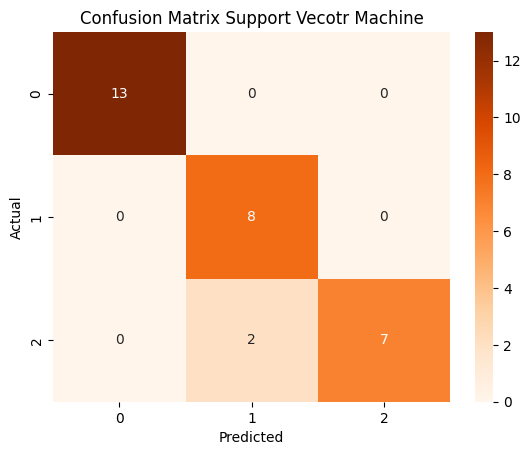

In [72]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Oranges", fmt='g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Support Vecotr Machine")

plt.savefig("Support Vecotr Machine.jpg", dpi=2000, bbox_inches="tight")

plt.show()


In [56]:
precision_score(y_test,y_pred, average = 'weighted')*100

100.0

In [57]:
recall_score(y_test,y_pred, average = 'macro')*100

100.0

In [58]:
f1_score(y_test,y_pred, average = 'micro')*100

100.0

# KNN Classifier

In [59]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
# Initialize KNN with k=5 (default)
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(x_train, y_train)


KNeighborsClassifier()

In [61]:
# Predict on test data
y_pred = knn.predict(x_test)


Accuracy: 100.0
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      1.00      1.00         8
 Iris-virginica       1.00      1.00      1.00         9

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



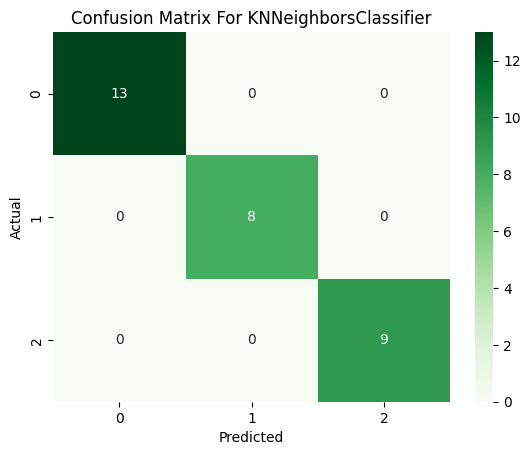

In [62]:
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Greens", fmt='g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix For KNNeighborsClassifier")

plt.savefig("KNNeighborsClassifier.jpg", dpi=2000, bbox_inches="tight")

plt.show()



In [63]:
precision_score(y_test,y_pred, average = 'weighted')*100

100.0

In [64]:
recall_score(y_test,y_pred, average = 'macro')*100

100.0

In [65]:
f1_score(y_test,y_pred, average = 'micro')*100

100.0

In [66]:
# Test different k values
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    print(f"k={k}, Accuracy={accuracy_score(y_test, y_pred)*100:.4f}")


k=1, Accuracy=100.0000
k=2, Accuracy=93.3333
k=3, Accuracy=100.0000
k=4, Accuracy=100.0000
k=5, Accuracy=100.0000
k=6, Accuracy=96.6667
k=7, Accuracy=96.6667
k=8, Accuracy=96.6667
k=9, Accuracy=96.6667
k=10, Accuracy=93.3333


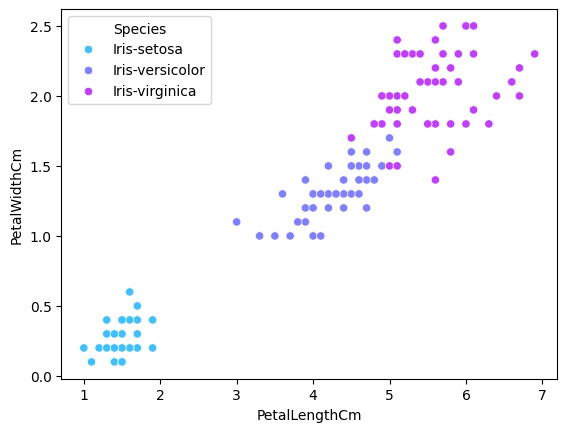

In [67]:
sns.scatterplot(data=df, x=df['PetalLengthCm'], y=df['PetalWidthCm'], hue='Species', palette='cool')

plt.savefig("Distinguishable.jpg", dpi=2000, bbox_inches="tight")

plt.show()

In [68]:
df.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
